In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

In [91]:
dataset = pd.read_csv ("Booking_data.csv")

In [92]:
dataset.head()

,BOOKINGSITENAME,BOOKINGDATE,BOWLINGPARTYSIZE,BOWLINGQTY,VISITDATE,BOOKINGCHANNEL,BOOKINGVALUE,RSRVTYPEKEY,RSRVTYPEDESC,EMAIL
0,Southampton,27/05/2024,NaN,NaN,27/05/2024,Made from Web,14.5,841,Web Pingo's,EMAIL_d36e1d1e
1,Manchester (Parrswood),02/11/2024,5.0,3.0,02/11/2024,Made from Web,114.5,825,Web Bowl Other,EMAIL_7f5c9e41
2,Walsall,22/02/2024,4.0,2.0,25/02/2024,Made from Web,50.4,825,Web Bowl Other,EMAIL_b3a9bca7
3,Walsall,08/03/2024,2.0,2.0,08/03/2024,Made from Web,26.0,825,Web Bowl Other,EMAIL_b3a9bca7
4,Chichester,04/08/2024,5.0,2.0,04/08/2024,Made from Web,97.6,828,Web Eat N Play,EMAIL_cf345354


## Data loading and understanding

Firstly, we have loaded the Booking_data.csv dataset and began to see where there could be space for possible cleaning. In our circumstance, the ask of the project is not affected by NULL values - so we have decided not to drop or imputate any values.

We have also used this space to understand what data types we are working with and statistical facts regarding counts and means, with a describe.

In [115]:
dataset.isnull().sum()

BOOKINGSITENAME         0
BOOKINGDATE             0
BOWLINGPARTYSIZE    33399
BOWLINGQTY          62703
VISITDATE               0
BOOKINGCHANNEL          0
BOOKINGVALUE            9
RSRVTYPEKEY             0
RSRVTYPEDESC         7801
EMAIL                   0
VISIT_DAY               0
dtype: int64

In [116]:
dataset.describe()

,BOOKINGDATE,BOWLINGPARTYSIZE,BOWLINGQTY,VISITDATE,BOOKINGVALUE,RSRVTYPEKEY
count,550491,517092.000000,487788.000000,550491,550482.000000,550491.000000
mean,2024-06-22 04:31:51.582206208,4.040842,1.977496,2024-06-25 02:24:22.114366976,38.367524,808.076027
min,2023-02-03 00:00:00,0.000000,1.000000,2024-01-01 00:00:00,0.000000,4.000000
25%,2024-03-18 00:00:00,2.000000,1.000000,2024-03-23 00:00:00,20.000000,825.000000
50%,2024-06-19 00:00:00,3.000000,2.000000,2024-06-22 00:00:00,30.000000,825.000000
75%,2024-09-25 00:00:00,5.000000,2.000000,2024-09-28 00:00:00,44.590000,827.000000
max,2025-01-02 00:00:00,227.000000,48.000000,2025-01-01 00:00:00,1577.600000,931.000000
std,NaN,2.919991,1.058890,NaN,34.542300,68.369186


In [119]:
dataset.dtypes

BOOKINGSITENAME             object
BOOKINGDATE         datetime64[ns]
BOWLINGPARTYSIZE           float64
BOWLINGQTY                 float64
VISITDATE           datetime64[ns]
BOOKINGCHANNEL              object
BOOKINGVALUE               float64
RSRVTYPEKEY                  int64
RSRVTYPEDESC                object
EMAIL                       object
VISIT_DAY                   object
dtype: object

In [95]:
dataset.count()

BOOKINGSITENAME     550491
BOOKINGDATE         550491
BOWLINGPARTYSIZE    517092
BOWLINGQTY          487788
VISITDATE           550491
BOOKINGCHANNEL      550491
BOOKINGVALUE        550482
RSRVTYPEKEY         550491
RSRVTYPEDESC        542690
EMAIL               550491
dtype: int64

## Change to datetime from date

A notice on the date columns to be converted to datetime to allow for day names to be extracted and then a test graph to see what we are working with. 

In [120]:
dataset['BOOKINGDATE'] = pd.to_datetime(dataset['BOOKINGDATE'], dayfirst=True)
dataset['VISITDATE'] = pd.to_datetime(dataset['VISITDATE'], dayfirst=True)

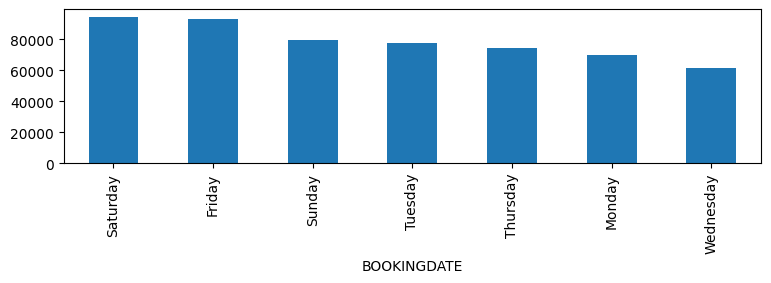

In [127]:
figsize=(9, 2)

dataset['BOOKINGDATE'].dt.day_name().value_counts().plot(kind = "bar", figsize=figsize);pass

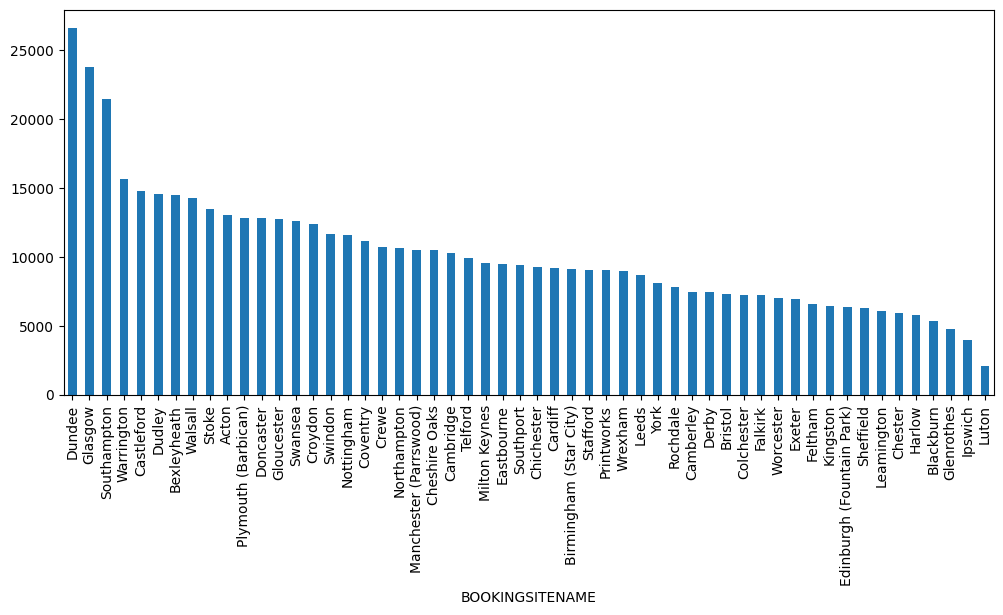

In [122]:
figsize=(12, 5)

dataset['BOOKINGSITENAME'].value_counts().plot(kind = "bar", figsize=figsize);pass

In [99]:
dataset['VISITDATE'] = pd.to_datetime(dataset['VISITDATE'], dayfirst=True, errors='coerce')

In [100]:
dataset['VISIT_DAY'] = dataset['VISITDATE'].dt.day_name()

In [101]:
dataset.head()

,BOOKINGSITENAME,BOOKINGDATE,BOWLINGPARTYSIZE,BOWLINGQTY,VISITDATE,BOOKINGCHANNEL,BOOKINGVALUE,RSRVTYPEKEY,RSRVTYPEDESC,EMAIL,VISIT_DAY
0,Southampton,2024-05-27,NaN,NaN,2024-05-27,Made from Web,14.5,841,Web Pingo's,EMAIL_d36e1d1e,Monday
1,Manchester (Parrswood),2024-11-02,5.0,3.0,2024-11-02,Made from Web,114.5,825,Web Bowl Other,EMAIL_7f5c9e41,Saturday
2,Walsall,2024-02-22,4.0,2.0,2024-02-25,Made from Web,50.4,825,Web Bowl Other,EMAIL_b3a9bca7,Sunday
3,Walsall,2024-03-08,2.0,2.0,2024-03-08,Made from Web,26.0,825,Web Bowl Other,EMAIL_b3a9bca7,Friday
4,Chichester,2024-08-04,5.0,2.0,2024-08-04,Made from Web,97.6,828,Web Eat N Play,EMAIL_cf345354,Sunday


In [102]:
target_days = ['Monday', 'Wednesday', 'Thursday']
weekday_df = dataset[dataset['VISIT_DAY'].isin(target_days)]

In [103]:
weekday_df.head()

,BOOKINGSITENAME,BOOKINGDATE,BOWLINGPARTYSIZE,BOWLINGQTY,VISITDATE,BOOKINGCHANNEL,BOOKINGVALUE,RSRVTYPEKEY,RSRVTYPEDESC,EMAIL,VISIT_DAY
0,Southampton,2024-05-27,NaN,NaN,2024-05-27,Made from Web,14.50,841,Web Pingo's,EMAIL_d36e1d1e,Monday
12,York,2024-03-30,5.0,2.0,2024-04-01,Made from Web,30.00,825,Web Bowl Other,EMAIL_fe859084,Monday
13,Manchester (Parrswood),2024-05-06,5.0,NaN,2024-05-06,Made from Web,32.00,849,Web Bowl and Pizza,EMAIL_9f378d06,Monday
14,Milton Keynes,2024-05-06,6.0,NaN,2024-05-06,Made from Web,39.58,849,Web Bowl and Pizza,EMAIL_d44dd2b4,Monday
18,Cardiff,2024-05-06,4.0,1.0,2024-05-06,Made from Web,31.00,825,Web Bowl Other,EMAIL_b6b087f6,Monday


In [104]:
weekday_counts = (
    weekday_df
    .groupby('EMAIL')
    .agg(
        weekday_visits=('VISIT_DAY', 'size'),
        total_visits=('VISIT_DAY', 'count'),
        avg_booking_value=('BOOKINGVALUE', 'mean'),
        last_visit=('VISITDATE', 'max')
    )
    .reset_index()
)

In [105]:
top_targets = user_profile.sort_values('weekday_visits', ascending=False)

In [106]:
top_targets.head(10)

,EMAIL,weekday_visits,total_visits,avg_booking_value,last_visit,all_visits
31519,EMAIL_4554d5fa,6598,6598,22.935688,2025-01-01,13771
43891,EMAIL_60e5d503,120,120,35.151417,2025-01-01,361
112696,EMAIL_f8382a44,74,74,21.189189,2024-10-28,137
45096,EMAIL_63ad8959,71,71,0.260563,2024-12-09,129
113363,EMAIL_f9b35fb7,54,54,39.088889,2024-12-09,54
34861,EMAIL_4cf220ac,53,53,0.377358,2024-11-13,116
62959,EMAIL_8b6513c1,46,46,0.163043,2024-12-11,110
63796,EMAIL_8d26e2f5,45,45,25.997556,2024-11-28,97
83622,EMAIL_b8736ca7,37,37,20.000000,2024-12-19,79
50820,EMAIL_705e1bf6,37,37,31.313514,2024-12-19,38


In [107]:
top_10_excl_first = top_targets.iloc[1:11]

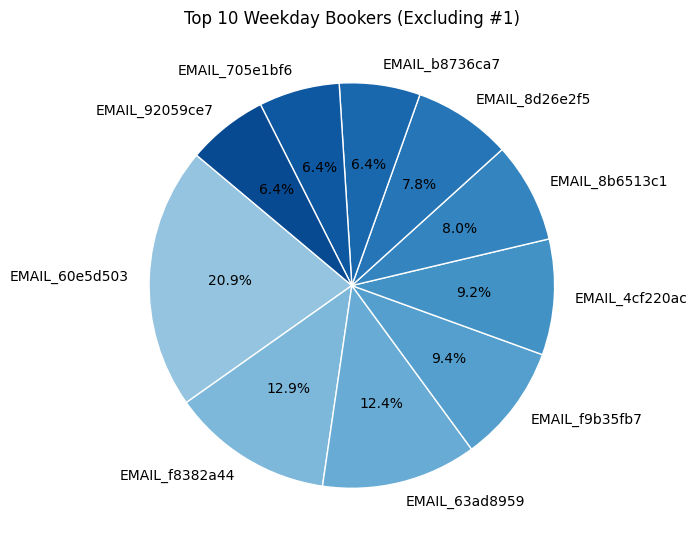

In [114]:
plt.figure(figsize=(7, 7))
colors = cm.Blues(np.linspace(0.4, 0.9, 10))
plt.pie(
    top_10_excl_first['weekday_visits'],
    labels=top_10_excl_first['EMAIL'],
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white'},
    colors=colors
)
plt.title("Top 10 Weekday Bookers (Excluding #1)")
plt.tight_layout()
plt.show()


In [109]:
weekday_data = dataset[dataset['VISIT_DAY'].isin(target_days)]

In [110]:
site_counts = weekday_data['BOOKINGSITENAME'].value_counts().reset_index()
site_counts.columns = ['BOOKINGSITENAME', 'Weekday_Bookings']

In [111]:
top_5_sites = site_counts.head(5)
bottom_5_sites = site_counts.tail(5)

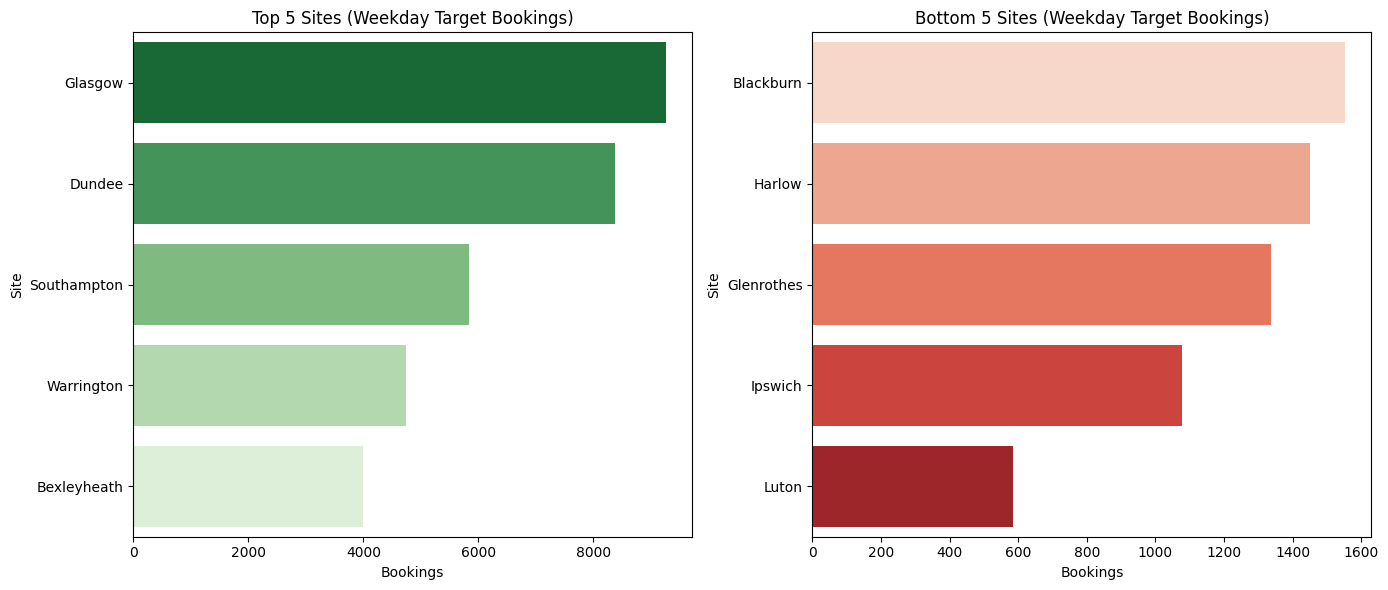

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Top 5
sns.barplot(data=top_5_sites, x='Weekday_Bookings', y='BOOKINGSITENAME', ax=axes[0], palette='Greens_r', hue='BOOKINGSITENAME', legend='auto')
axes[0].set_title("Top 5 Sites (Weekday Target Bookings)")
axes[0].set_xlabel("Bookings")
axes[0].set_ylabel("Site")

# Bottom 5
sns.barplot(data=bottom_5_sites, x='Weekday_Bookings', y='BOOKINGSITENAME', ax=axes[1], palette='Reds', hue='BOOKINGSITENAME', legend='auto')
axes[1].set_title("Bottom 5 Sites (Weekday Target Bookings)")
axes[1].set_xlabel("Bookings")
axes[1].set_ylabel("Site")

plt.tight_layout()
plt.show()